### To develop a customer behavior clustering based on the usage behavior of credit card holders for six months. This dataset is at the customer level with 18 behviroal variables and around 9,000 records.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
df.shape

(8950, 18)

## Data Preprocessing

### Dealing with missing values

In [7]:
df.isna().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

### Since miss values for each feature are pretty low (313/8950), I decide to fill in the missing value cells with mean of each feature. 

In [8]:
df.fillna(df.mean(), inplace = True)

### Dealing with outliers

[Text(0, 0, 'BALANCE'),
 Text(0, 0, 'BALANCE_FREQUENCY'),
 Text(0, 0, 'PURCHASES'),
 Text(0, 0, 'ONEOFF_PURCHASES'),
 Text(0, 0, 'INSTALLMENTS_PURCHASES'),
 Text(0, 0, 'CASH_ADVANCE'),
 Text(0, 0, 'PURCHASES_FREQUENCY'),
 Text(0, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(0, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_TRX'),
 Text(0, 0, 'PURCHASES_TRX'),
 Text(0, 0, 'CREDIT_LIMIT'),
 Text(0, 0, 'PAYMENTS'),
 Text(0, 0, 'MINIMUM_PAYMENTS'),
 Text(0, 0, 'PRC_FULL_PAYMENT'),
 Text(0, 0, 'TENURE')]

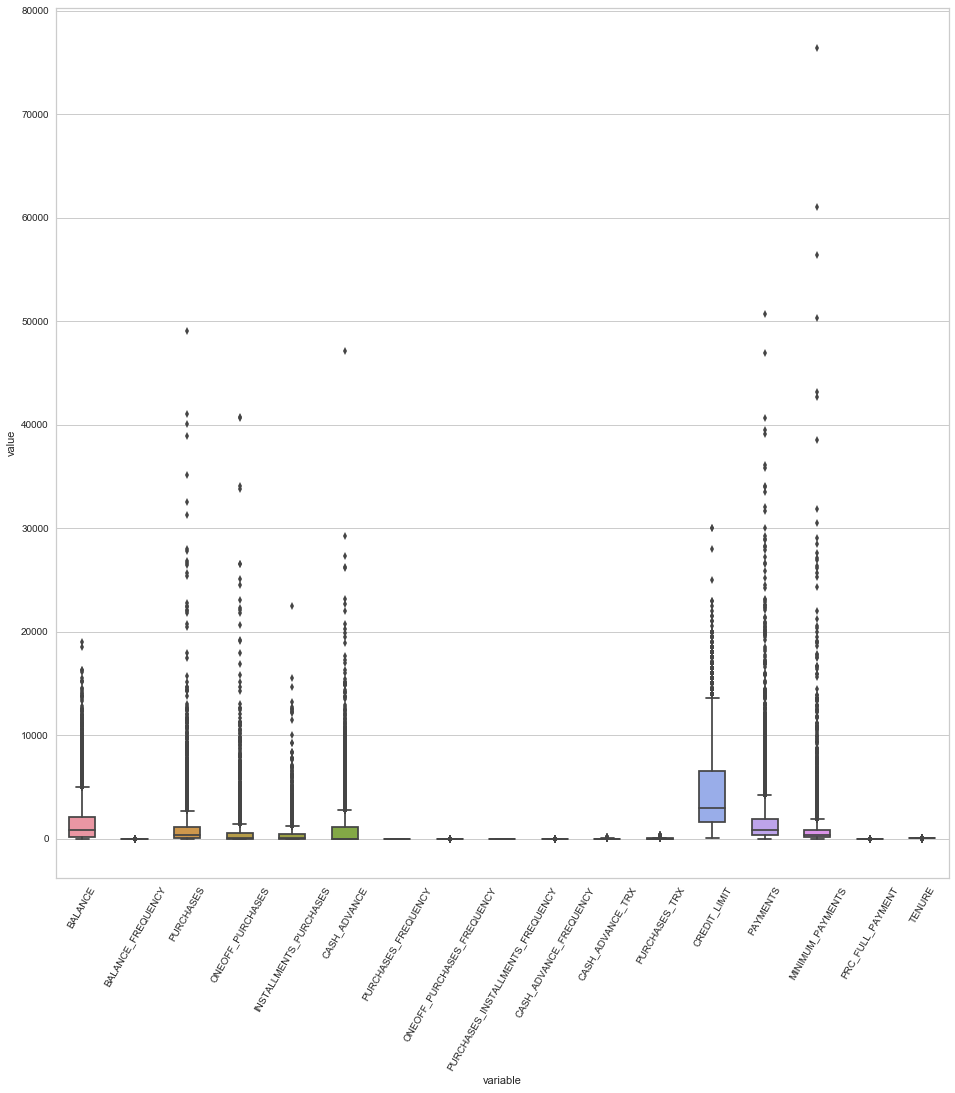

In [9]:
plt.figure(figsize= (16, 16))
box_plot = sns.boxplot( x = 'variable', y = 'value', data = pd.melt(df.iloc[:, 1:]), width = 0.5)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation= 60)


### It shows that there are so many outliers in this dataset.  However, K-means can be quite sensitive to outliers.  Thus, although dropping the rows with outliers would lose some records, I would remove those points outside of 3 standard deviations from means 

### Removing outliers

In [10]:
data = df.iloc[:, 1:]

In [11]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis = 1)]
data.shape

(7434, 17)

### Feature scaling

In [12]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

/Users/Jammy/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Jammy/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Data Modeling

### To select the optimal number of cluster (K)

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabaz', timings = False)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a21e5f978>,
         k=None, metric=None, model=None, timings=False)

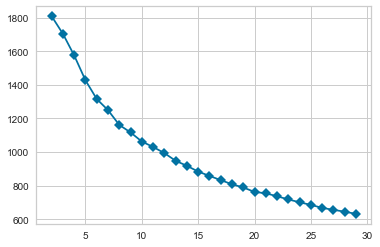

In [17]:
visualizer.fit(X)

### Using Elbow Method to find the optimal number of clusters. Although it's unclear to find the value of k due to the clustered data and multi-dimensions, we select k = 6 as the optimal value of k.

### K = 6

In [18]:
model_6 = KMeans(6)
model_6.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
data['cluster'] = model_6.labels_

### Distribution of customers

Text(0, 0.5, 'Number of Customers')

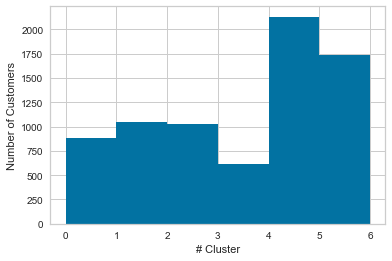

In [20]:
plt.hist(data['cluster'], bins = range(7))
plt.xlabel('# Cluster')
plt.ylabel('Number of Customers')

/Users/Jammy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Jammy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Jammy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Jammy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

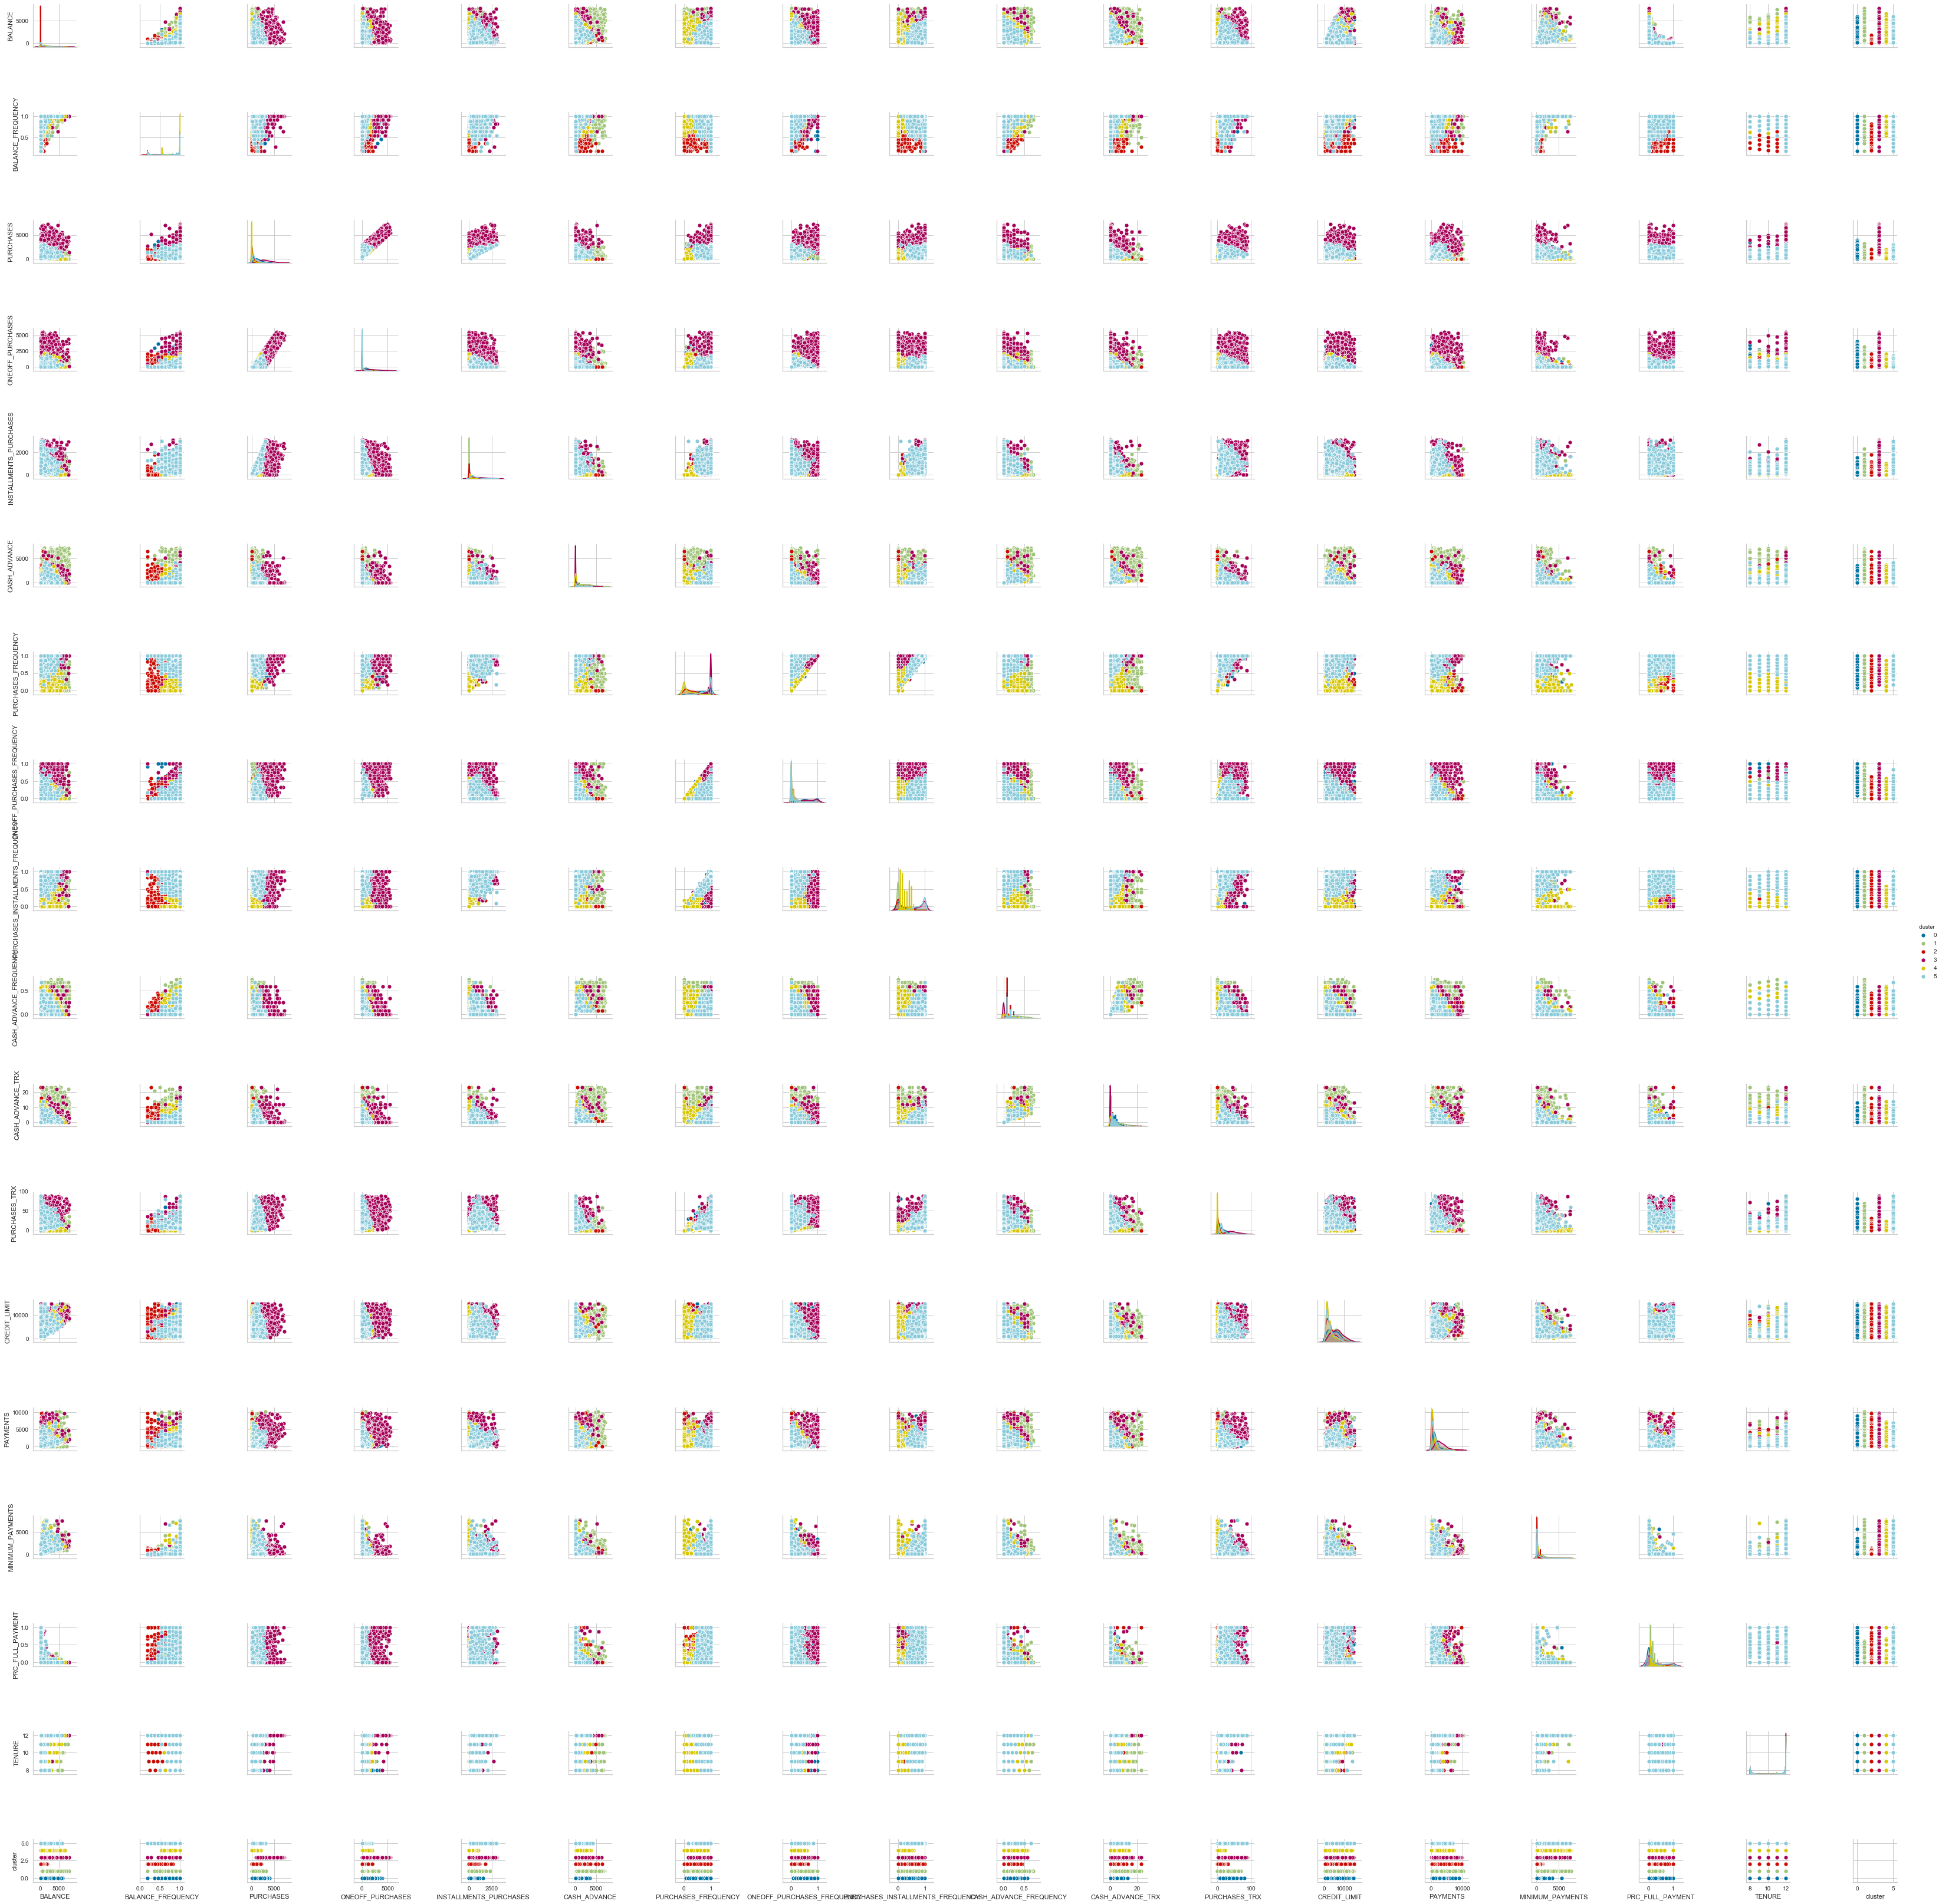

In [21]:
sns.pairplot(data, hue = 'cluster')